<a href="https://colab.research.google.com/github/ImNotDanish05/2025_KC_TI-1A/blob/main/P8_Jobsheet_Supervise_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
!pip install danish05

In [ ]:
# import library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import danish05
from google.colab import drive
drive.mount("/content/drive")
default_path = "/content/drive/MyDrive/Danish05/File Belajar/Coding Fun/Data/Kecerdasan Buatan/P8"
danish05.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


******************************


This code made by Danish05! :D
Here is my social media:
Youtube	: https://www.youtube.com/@ImNotDanish05
Tiktok	: https://www.tiktok.com/@imnotdanish05
Github	: https://github.com/ImNotDanish05
Gmail	: mailto:imnotdanish05bussiness@gmail.com


## Load Dataset

In [ ]:
# load dataset
dataset = pd.read_csv(os.path.join(default_path, 'iklan_sosmed.csv'), delimiter=';')
dataset.head()

,ID,Jenis_Kelamin,Umur,Gaji,Transaksi
0,15624510,Pria,19,285000000,0
1,15810944,Pria,35,300000000,0
2,15668575,Wanita,26,645000000,0
3,15603246,Wanita,27,855000000,0
4,15804002,Pria,19,1140000000,0


## Menampilkan Properti Data

In [ ]:
dataset.shape

(400, 5)

In [ ]:
dataset.dtypes

,0
ID,int64
Jenis_Kelamin,object
Umur,int64
Gaji,int64
Transaksi,int64


## Cek Missing Value dan Duplikasi Data

In [ ]:
dataset.isnull().sum()

,0
ID,0
Jenis_Kelamin,0
Umur,0
Gaji,0
Transaksi,0


In [ ]:
dataset.duplicated().sum()

np.int64(0)

## Cek Korelasi dengan kolom Transaksi

In [ ]:
dataset.drop(['ID', 'Jenis_Kelamin'],axis=1,inplace=True)

In [ ]:
dataset.corr()['Transaksi']

,Transaksi
Umur,0.622454
Gaji,0.362083
Transaksi,1.000000


In [ ]:
dataset.head()

,Umur,Gaji,Transaksi
0,19,285000000,0
1,35,300000000,0
2,26,645000000,0
3,27,855000000,0
4,19,1140000000,0


In [ ]:
# Memilih Umur & Gaji Sebagai Data Fitur dan Transaksi sebagai Data Label
X = dataset.iloc[:,:2]
y = dataset.iloc[:, -1]
print(X)
print(y)

     Umur        Gaji
0      19   285000000
1      35   300000000
2      26   645000000
3      27   855000000
4      19  1140000000
..    ...         ...
395    46   615000000
396    51   345000000
397    50   300000000
398    36   495000000
399    49   540000000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Transaksi, Length: 400, dtype: int64


## Train Test Split

In [ ]:
# Membagi dataset menjadi 80% Data Training dan 20% Data Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
# ubah dari dataframe / series pandas menjadi np.array
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
# Normalisasi dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Buat klasifier dan Lakukan Training

## DecisionTree Classifier

In [ ]:
# Buat Klasifier dengan DecisionTree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [ ]:
# Melatih model dengan menggunakan data latih
classifier = classifier.fit(X_train, y_train)

In [ ]:
# Melakukan prediksi pada X_test
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
# buat confussion matrix & skor akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)

Akurasi : 81.25%
Confussion Matrix : 
[[49  7]
 [ 8 16]]


<ipython-input-228-e218580cc089>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


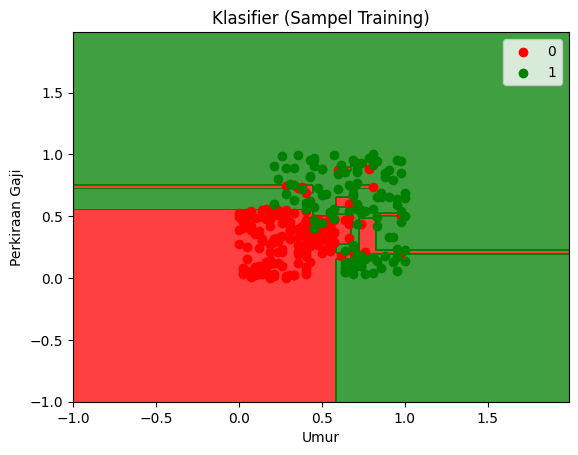

In [ ]:
### Melakukan Visualisasi Data Train dan Data Test
# visualisasi sampel data train
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

<ipython-input-229-af4c1ccef277>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


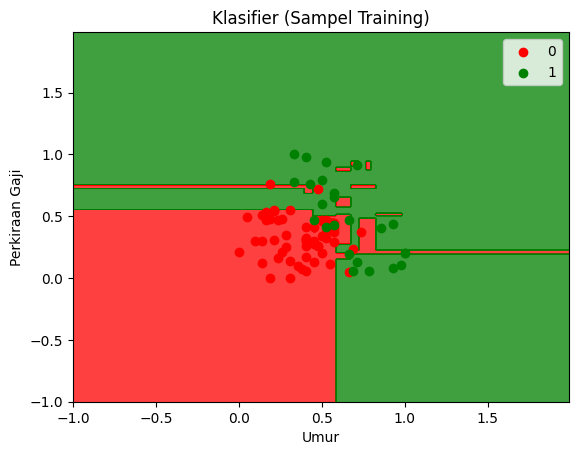

In [ ]:
# visualisasi sampel data tes
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    classifier,
    out_file = "iris_tree.dot",
    feature_names = ['Umur', 'Gaji'],
    class_names = ['0', '1'],
    rounded= True,
    filled =True)

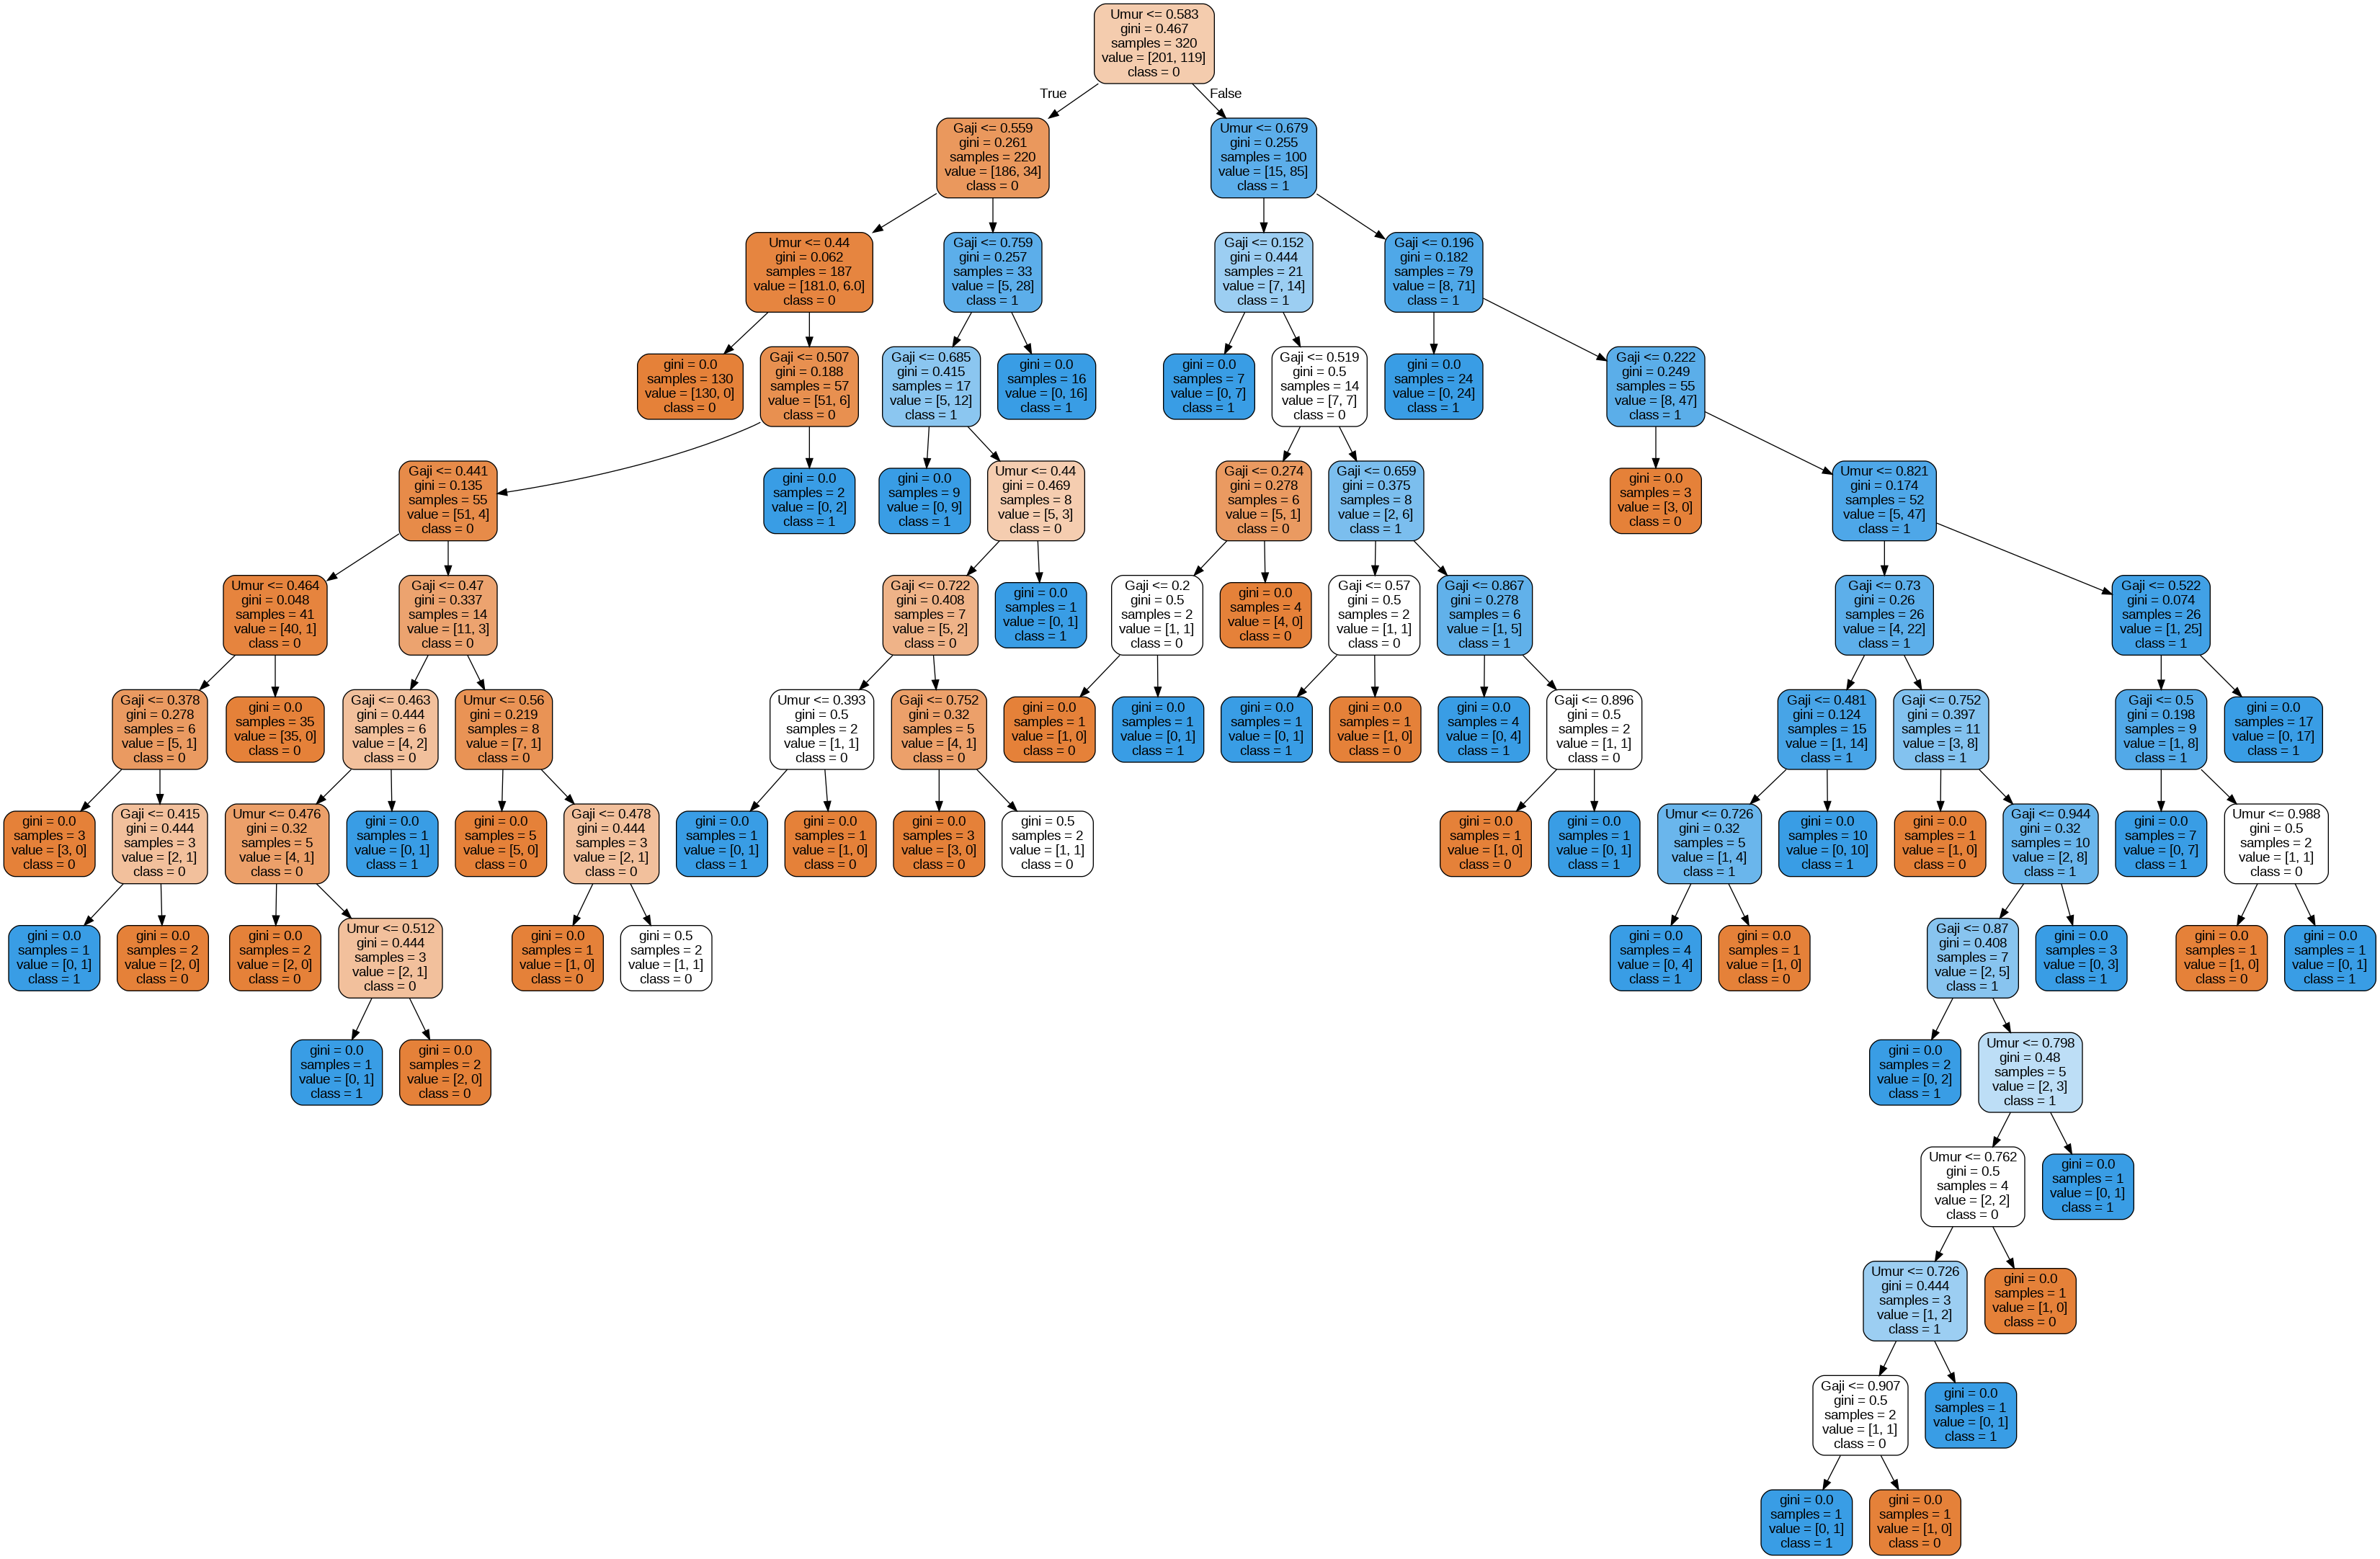

In [ ]:
from graphviz import Source
from IPython.display import Image
with open("iris_tree.dot", "r") as f:
    dot_data = f.read()

graph = Source(dot_data)
graph.render("tree_image", format="png", cleanup=False)
Image("tree_image.png")

## Logistic Regression

In [ ]:
# Buat Klasifier dengan LinearRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [ ]:
# Melatih model dengan menggunakan data latih
classifier = classifier.fit(X_train, y_train)

In [ ]:
# Melakukan prediksi pada X_test
y_pred = classifier.predict(X_test)

In [ ]:
# buat confussion matrix & skor akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)

Akurasi : 85.0%
Confussion Matrix : 
[[54  2]
 [10 14]]


<ipython-input-236-e218580cc089>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


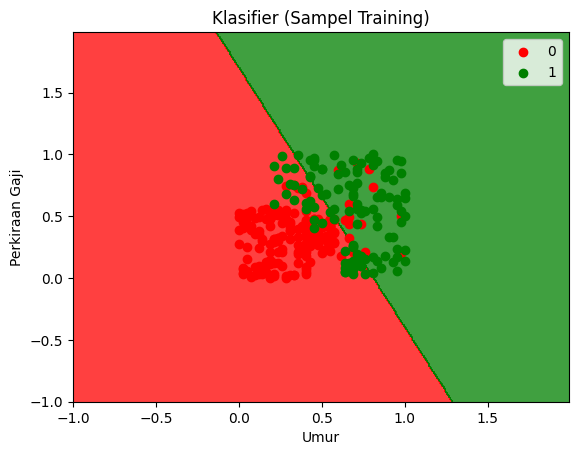

In [ ]:
# visualisasi sampel data train
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

### Melakukan Visualisasi Data Train dan Data Test

<ipython-input-237-af4c1ccef277>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


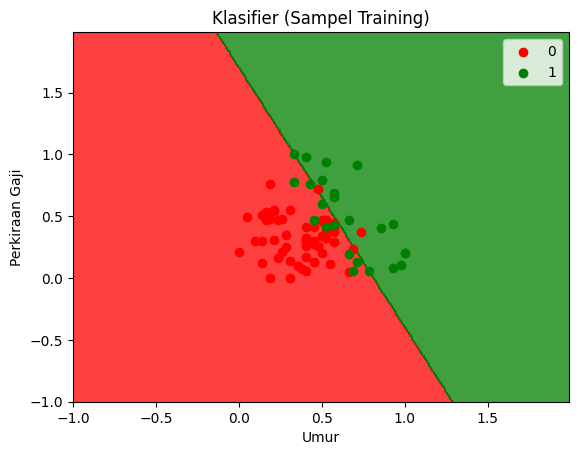

In [ ]:
# visualisasi sampel data tes
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()